In [2]:
import numpy as np
import pandas as pd

# data = pd.read_csv(r"C:\Users\clare\Documents\SHO-simulation\pendulum_simulation.csv", nrows=1000)

# data

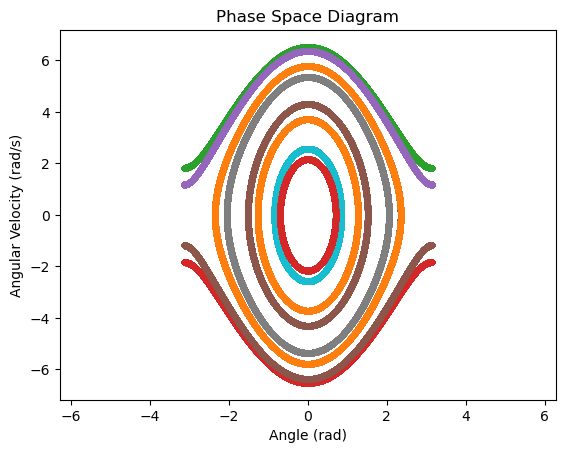

In [3]:
import matplotlib.pyplot as plt
import csv
import os
import math

def wrap_angle(angle):
    wrapped = math.fmod(angle, 2*math.pi)
    if wrapped >= math.pi:
        wrapped -= 2*math.pi
    elif wrapped < -math.pi:
        wrapped += 2*math.pi
    return wrapped

def plot_phase_space(folder_path, pic_name):
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    for filename in files:
        theta_vals = []
        omega_vals = []
        with open(os.path.join(folder_path, filename), 'r') as f:
            reader = csv.reader(f)
            next(reader)  
            for row in reader:
                angle = float(row[1])
                omega = float(row[2])
                angle = wrap_angle(angle) 
                theta_vals.append(angle)
                omega_vals.append(omega)
        plt.plot(theta_vals, omega_vals, '.',label=filename)

    plt.xlabel('Angle (rad)')
    plt.ylabel('Angular Velocity (rad/s)')
    plt.xlim(-2*math.pi, 2*math.pi)
    plt.title('Phase Space Diagram')
    plt.savefig(pic_name)
    plt.show()


plot_phase_space("SimulationResultFinal", "Phase Space Test")


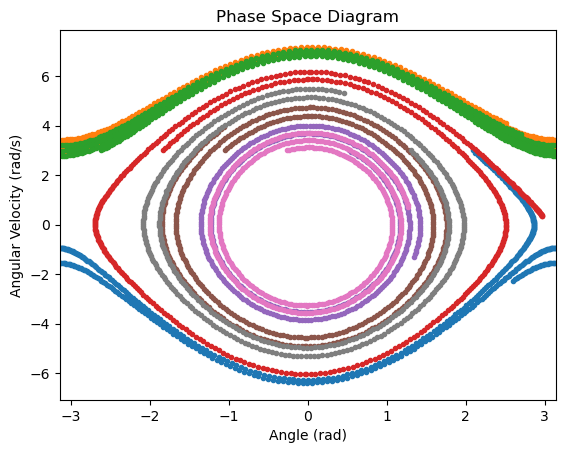

In [9]:
plot_phase_space("SimulationResultO2", "Phase Space (AngVelo=2)")

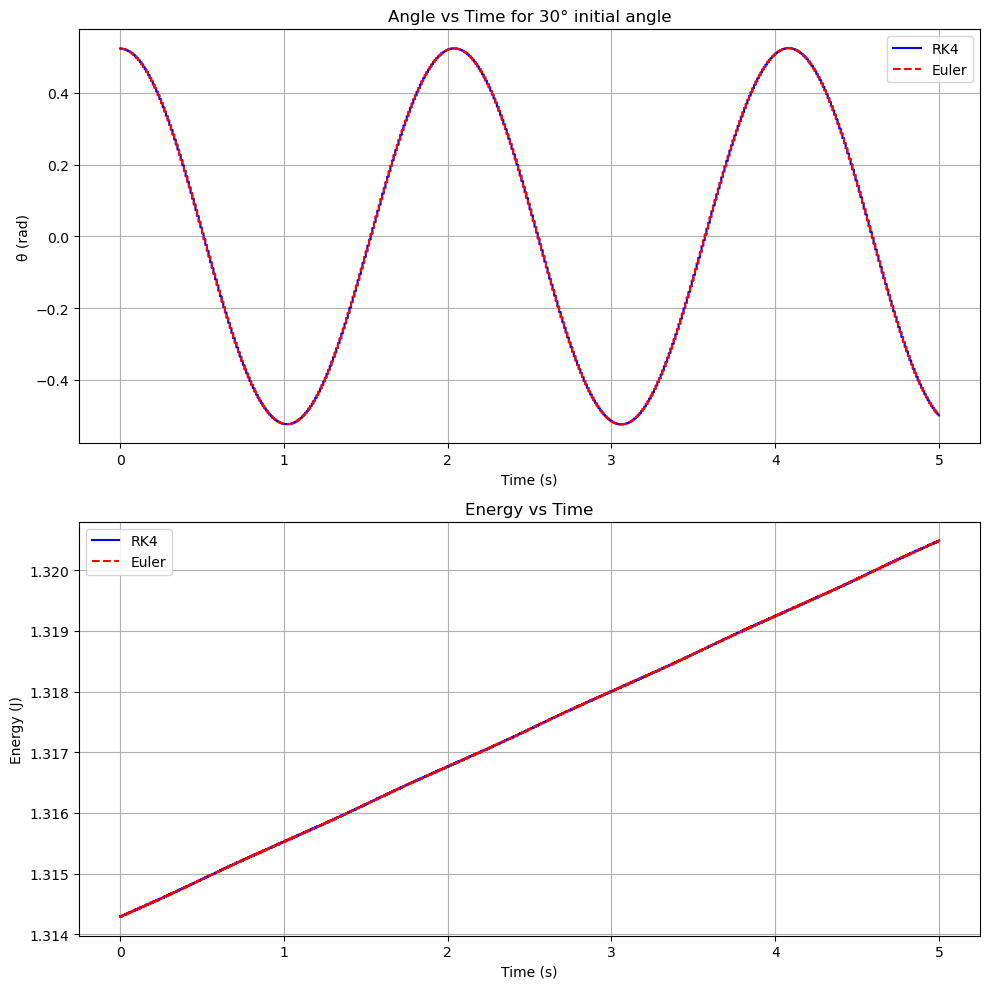

In [13]:
def compare_methods(rk4_folder, euler_folder, angle_deg):
    # Read data from both methods for the specified angle
    filename = f"pendulum_simulation_{angle_deg}_deg.csv"
    
    # Read RK4 data
    rk4_data = pd.read_csv(os.path.join(rk4_folder, filename))
    
    # Read Euler data
    euler_data = pd.read_csv(os.path.join(euler_folder, filename))
    
    # Calculate energy (E = T + V = 1/2*m*L^2*ω^2 + m*g*L*(1-cos(θ)))
    # Since m and L are 1, we can simplify
    L = 1.0
    g = 9.81
    
    rk4_energy = 0.5 * L**2 * rk4_data['ANGULAR_VELOCITY']**2 + g*L*(1-np.cos(rk4_data['ANGLE']))
    euler_energy = 0.5 * L**2 * euler_data['ANGULAR_VELOCITY']**2 + g*L*(1-np.cos(euler_data['ANGLE']))
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
    # Plot theta vs time
    ax1.plot(rk4_data['TIME'], rk4_data['ANGLE'], 'b-', label='RK4')
    ax1.plot(euler_data['TIME'], euler_data['ANGLE'], 'r--', label='Euler')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('θ (rad)')
    ax1.set_title(f'Angle vs Time for 30° initial angle')
    ax1.legend()
    ax1.grid(True)
    
    # Plot energy vs time
    ax2.plot(rk4_data['TIME'], rk4_energy, 'b-', label='RK4')
    ax2.plot(euler_data['TIME'], euler_energy, 'r--', label='Euler')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Energy (J)')
    ax2.set_title('Energy vs Time')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Compare methods for 30 degrees initial angle
compare_methods("SimulationResultO0", "EulerSimulationResultO0", 29)